In [1]:
%%time
import malaya
%matplotlib inline

CPU times: user 12.2 s, sys: 1.39 s, total: 13.6 s
Wall time: 17.2 s


## Load malaya news word2vec

In [2]:
embedded = malaya.word2vec.load(256)

## Load word2vec model

In [3]:
word_vector = malaya.word2vec.word2vec(embedded['nce_weights'], embedded['dictionary'])

## Check top-k similar semantics based on a word

In [4]:
word = 'anwar'
print("Embedding layer: 8 closest words to: '%s'"%(word))
print(word_vector.n_closest(word=word, num_closest=8, metric='cosine'))

Embedding layer: 8 closest words to: 'anwar'
[['mahathir', 0.44774019718170166], ['beliau', 0.44170427322387695], ['zaid', 0.43993180990219116], ['hishammuddin', 0.4343132972717285], ['kuok', 0.43307822942733765], ['husam', 0.43213725090026855], ['anifah', 0.4307258129119873], ['pesakit', 0.4262162446975708]]


## Calculate vb - va + vc

In [5]:
print(word_vector.analogy('anwar', 'penjara', 'kerajaan', 5))

['penjara', 'kerajaan', 'kkm', 'kabinet', 'tuju']


## Word2vec calculator

You can put any equation you wanted.

In [6]:
word_vector.calculator('anwar + amerika + mahathir', num_closest=8, metric='cosine',
                      return_similarity=False)

['mahathir',
 'anwar',
 'amerika',
 'UNK',
 'najib',
 'husam',
 'kuok',
 'azalina',
 'mujahid']

In [7]:
word_vector.calculator('anwar * amerika', num_closest=8, metric='cosine',
                      return_similarity=False)

['turut',
 'pengajian',
 'tangan',
 'beli',
 'terus',
 'susulan',
 'pengetahuan',
 'tujuan',
 'meter']

## Visualize scatter-plot

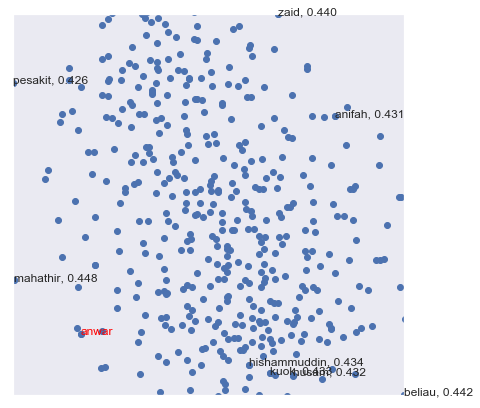

In [8]:
word = 'anwar'
result = word_vector.n_closest(word=word, num_closest=8, metric='cosine')
word_vector.scatter_plot(result, centre = word, notebook_mode = True)

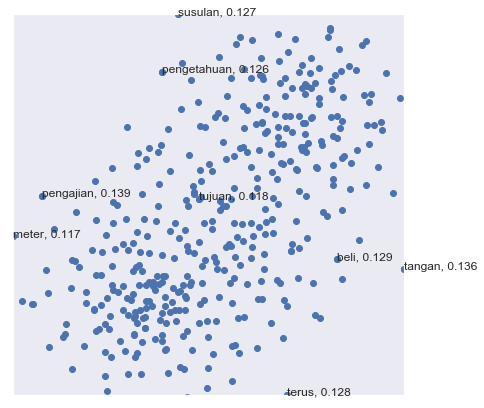

In [9]:
result = word_vector.calculator('anwar * amerika', num_closest=8, metric='cosine',
                      return_similarity=True)
word_vector.scatter_plot(result, notebook_mode = True)

## Visualize tree-plot

<Figure size 504x504 with 0 Axes>

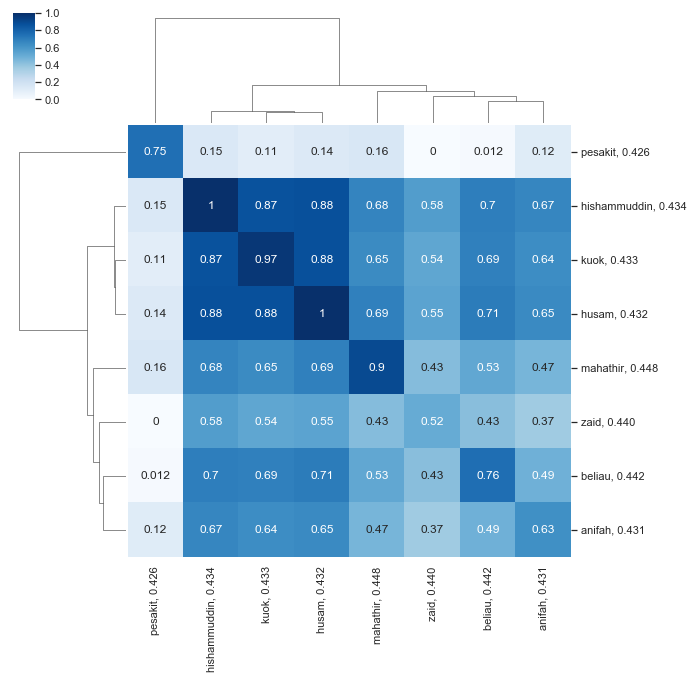

In [10]:
word = 'anwar'
result = word_vector.n_closest(word=word, num_closest=8, metric='cosine')
word_vector.tree_plot(result, notebook_mode = True)

## Get embedding from a word

If a word not found in the vocabulary, it will throw an exception with top-5 nearest words

In [11]:
word_vector.get_vector_by_name('husein-comel')

Exception: input not found in dictionary, here top-5 nearest words [income, husein, incomes, hussein, husseiny]